# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

__Número de grupo: 13__

__Nombres de los estudiantes: Esther Babon Arcauz y Claudia López-Mingo Moreno__

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [1]:
##Primero debemos importar la herramienta de panda desde numpy
import numpy as np
import pandas as pd

In [2]:
##solo para ejecutarlo en collaborate
from google.colab import files
uploaded = files.upload()

Saving mobile_phones.csv to mobile_phones.csv


In [3]:
##creamos el dataframe a partir de fichero mobile_phones.csv
df = pd.read_csv('mobile_phones.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [4]:
##COMPROBAMOS SI LAS CLASE A PREDECIR ESTA EQUILIBRADA
#EN ESTE CASO LA CLASE A PREDECIR ES PRICE_RANGE
##n de ejemplos de cada clase
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [5]:
# Frecuencia de las clases
df['price_range'].value_counts() / df['price_range'].count() * 100

1    25.0
2    25.0
3    25.0
0    25.0
Name: price_range, dtype: float64

En este caso las clases estan totalmente equilibradas. La tasa de aciertos puede presentar problemas en casos en los que las clases estén desequilibradas. Por ejemplo, si quiero detectar una enfermedad que afecta al 1% de la población, un clasificador que siempre de negativo como resultado acertara el 99% de las veces. 

In [6]:
##calculamos la correlación entre las variables númericas y price_range
# tabla de contingencia en porcentajes relativos segun clas
correlation = df.corr()
correlation['price_range']


battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

La variable que más correlación tiene con la variable de salida price_range es 'ram'.
Podemos concluir con esto que el precio se extrae principalmente del tamaño de la memoria ram.

Ahora que ya hemos calculado la correlación de todas las variables con price_range, podemos indicar a pandas que es una variable categórica.

In [7]:
df['price_range'] = df['price_range'].astype('category')

In [8]:
##rangos de las 4 variables numericas con mayor correlacion con la variable price_Range
df.groupby(['ram']).describe().transpose()


ram                   256          258    259     262     263     265   \
battery_power count    1.0     2.000000    1.0     1.0     1.0     1.0   
              mean   926.0  1617.000000  697.0  1515.0  1171.0  1065.0   
              std      NaN   260.215295    NaN     NaN     NaN     NaN   
              min    926.0  1433.000000  697.0  1515.0  1171.0  1065.0   
              25%    926.0  1525.000000  697.0  1515.0  1171.0  1065.0   
...                    ...          ...    ...     ...     ...     ...   
wifi          min      1.0     0.000000    1.0     0.0     0.0     0.0   
              25%      1.0     0.250000    1.0     0.0     0.0     0.0   
              50%      1.0     0.500000    1.0     0.0     0.0     0.0   
              75%      1.0     0.750000    1.0     0.0     0.0     0.0   
              max      1.0     1.000000    1.0     0.0     0.0     0.0   

ram                    267     273     277          278   ...   3969  \
battery_power count     1.0     1.0     1.0     2.000000  ...    1.0   
              mean   1546.0  1897.0  1113.0  1270.000000  ...  788.0   
              std       NaN     NaN     NaN   576.999133  ...    NaN   
              min    1546.0  1897.0  1113.0   862.000000  ...  788.0   
              25%    1546.0  1897.0  1113.0  1066.000000  ...  788.0   
...                     ...     ...     ...          ...  ...    ...   
wifi          min       0.0     1.0     1.0     0.000000  ...    1.0   
              25%       0.0     1.0     1.0     0.250000  ...    1.0   
              50%       0.0     1.0     1.0     0.500000  ...    1.0   
              75%       0.0     1.0     1.0     0.750000  ...    1.0   
              max       0.0     1.0     1.0     1.000000  ...    1.0   

ram                         3970    3971   3978    3984   3990         3991  \
battery_power count     2.000000     1.0    1.0     1.0    1.0     2.000000   
              mean   1720.500000  1523.0  858.0  1688.0  719.0  1301.000000   
              std     185.969083     NaN    NaN     NaN    NaN   376.180808   
              min    1589.000000  1523.0  858.0  1688.0  719.0  1035.000000   
              25%    1654.750000  1523.0  858.0  1688.0  719.0  1168.000000   
...                          ...     ...    ...     ...    ...          ...   
wifi          min       1.000000     1.0    0.0     1.0    1.0     0.000000   
              25%       1.000000     1.0    0.0     1.0    1.0     0.000000   
              50%       1.000000     1.0    0.0     1.0    1.0     0.000000   
              75%       1.000000     1.0    0.0     1.0    1.0     0.000000   
              max       1.000000     1.0    0.0     1.0    1.0     0.000000   

ram                    3993   3996    3998  
battery_power count     1.0    1.0     1.0  
              mean   1166.0  584.0  1456.0  
              std       NaN    NaN     NaN  
              min    1166.0  584.0  1456.0  
              25%    1166.0  584.0  1456.0  
...                     ...    ...     ...  
wifi          min       0.0    1.0     0.0  
              25%       0.0    1.0     0.0  
              50%       0.0    1.0     0.0  
              75%       0.0    1.0     0.0  
              max       0.0    1.0     0.0  

[152 rows x 1562 columns]

In [9]:
df.groupby(['battery_power']).describe().transpose()

battery_power      501   502       503       504   506   507       508   509   \
blue count     2.000000   2.0  3.000000  5.000000   1.0  2.00  3.000000   1.0   
     mean      0.500000   0.0  0.333333  0.800000   0.0  1.00  0.333333   1.0   
     std       0.707107   0.0  0.577350  0.447214   NaN  0.00  0.577350   NaN   
     min       0.000000   0.0  0.000000  0.000000   0.0  1.00  0.000000   1.0   
     25%       0.250000   0.0  0.000000  1.000000   0.0  1.00  0.000000   1.0   
...                 ...   ...       ...       ...   ...   ...       ...   ...   
wifi min       0.000000   0.0  0.000000  0.000000   0.0  0.00  0.000000   0.0   
     25%       0.250000   0.0  0.500000  0.000000   0.0  0.25  0.500000   0.0   
     50%       0.500000   0.0  1.000000  0.000000   0.0  0.50  1.000000   0.0   
     75%       0.750000   0.0  1.000000  1.000000   0.0  0.75  1.000000   0.0   
     max       1.000000   0.0  1.000000  1.000000   0.0  1.00  1.000000   0.0   

battery_power      510      511   ...  1988      1989     1991  1992  1993  \
blue count     3.000000  4.00000  ...   1.0  2.000000  4.00000  2.00   1.0   
     mean      0.333333  0.50000  ...   1.0  0.500000  0.50000  1.00   1.0   
     std       0.577350  0.57735  ...   NaN  0.707107  0.57735  0.00   NaN   
     min       0.000000  0.00000  ...   1.0  0.000000  0.00000  1.00   1.0   
     25%       0.000000  0.00000  ...   1.0  0.250000  0.00000  1.00   1.0   
...                 ...      ...  ...   ...       ...      ...   ...   ...   
wifi min       0.000000  0.00000  ...   0.0  0.000000  0.00000  0.00   0.0   
     25%       0.500000  0.00000  ...   0.0  0.250000  0.00000  0.25   0.0   
     50%       1.000000  0.00000  ...   0.0  0.500000  0.00000  0.50   0.0   
     75%       1.000000  0.25000  ...   0.0  0.750000  0.25000  0.75   0.0   
     max       1.000000  1.00000  ...   0.0  1.000000  1.00000  1.00   0.0   

battery_power      1994  1995      1996  1997  1998  
blue count     3.000000   2.0  2.000000   1.0   1.0  
     mean      0.666667   1.0  0.500000   1.0   1.0  
     std       0.577350   0.0  0.707107   NaN   NaN  
     min       0.000000   1.0  0.000000   1.0   1.0  
     25%       0.500000   1.0  0.250000   1.0   1.0  
...                 ...   ...       ...   ...   ...  
wifi min       0.000000   1.0  0.000000   0.0   0.0  
     25%       0.000000   1.0  0.250000   0.0   0.0  
     50%       0.000000   1.0  0.500000   0.0   0.0  
     75%       0.500000   1.0  0.750000   0.0   0.0  
     max       1.000000   1.0  1.000000   0.0   0.0  

[152 rows x 1094 columns]

In [10]:
df.groupby(['px_width']).describe().transpose()

px_width                    500          501     503     506          507   \
battery_power count     2.000000     2.000000     1.0     1.0     4.000000   
              mean   1332.500000  1311.500000  1083.0  1496.0  1102.750000   
              std      67.175144    51.618795     NaN     NaN   594.836882   
              min    1285.000000  1275.000000  1083.0  1496.0   627.000000   
              25%    1308.750000  1293.250000  1083.0  1496.0   834.750000   
...                          ...          ...     ...     ...          ...   
wifi          min       0.000000     0.000000     1.0     1.0     0.000000   
              25%       0.000000     0.250000     1.0     1.0     0.000000   
              50%       0.000000     0.500000     1.0     1.0     0.000000   
              75%       0.000000     0.750000     1.0     1.0     0.250000   
              max       0.000000     1.000000     1.0     1.0     1.000000   

px_width               508         509          510         511          512   \
battery_power count     1.0    2.000000     3.000000    2.000000     2.000000   
              mean   1698.0  892.000000  1338.000000  693.000000  1158.000000   
              std       NaN  427.092496   599.020033  100.409163   220.617316   
              min    1698.0  590.000000   818.000000  622.000000  1002.000000   
              25%    1698.0  741.000000  1010.500000  657.500000  1080.000000   
...                     ...         ...          ...         ...          ...   
wifi          min       0.0    0.000000     0.000000    0.000000     0.000000   
              25%       0.0    0.000000     0.000000    0.250000     0.250000   
              50%       0.0    0.000000     0.000000    0.500000     0.500000   
              75%       0.0    0.000000     0.500000    0.750000     0.750000   
              max       0.0    0.000000     1.000000    1.000000     1.000000   

px_width             ...         1988        1989    1990    1991    1992  \
battery_power count  ...     5.000000    3.000000     1.0     1.0     1.0   
              mean   ...  1307.600000  987.666667  1322.0  1397.0  1727.0   
              std    ...   422.634357  318.498561     NaN     NaN     NaN   
              min    ...   721.000000  637.000000  1322.0  1397.0  1727.0   
              25%    ...  1021.000000  852.000000  1322.0  1397.0  1727.0   
...                  ...          ...         ...     ...     ...     ...   
wifi          min    ...     0.000000    0.000000     0.0     1.0     1.0   
              25%    ...     0.000000    0.500000     0.0     1.0     1.0   
              50%    ...     1.000000    1.000000     0.0     1.0     1.0   
              75%    ...     1.000000    1.000000     0.0     1.0     1.0   
              max    ...     1.000000    1.000000     0.0     1.0     1.0   

px_width                    1994         1995    1996   1997    1998  
battery_power count     2.000000     3.000000     1.0    1.0     1.0  
              mean   1527.000000  1054.000000  1692.0  648.0  1068.0  
              std     161.220346   432.133081     NaN    NaN     NaN  
              min    1413.000000   767.000000  1692.0  648.0  1068.0  
              25%    1470.000000   805.500000  1692.0  648.0  1068.0  
...                          ...          ...     ...    ...     ...  
wifi          min       1.000000     0.000000     0.0    1.0     0.0  
              25%       1.000000     0.000000     0.0    1.0     0.0  
              50%       1.000000     0.000000     0.0    1.0     0.0  
              75%       1.000000     0.500000     0.0    1.0     0.0  
              max       1.000000     1.000000     0.0    1.0     0.0  

[152 rows x 1109 columns]

In [11]:
df.groupby(['px_height']).describe().transpose()

px_height                   0       1       2            3            4     \
battery_power count     2.000000     1.0     1.0     2.000000     3.000000   
              mean   1365.500000  1422.0  1412.0  1903.500000  1176.000000   
              std     662.559054     NaN     NaN     3.535534   648.114187   
              min     897.000000  1422.0  1412.0  1901.000000   608.000000   
              25%    1131.250000  1422.0  1412.0  1902.250000   823.000000   
...                          ...     ...     ...          ...          ...   
wifi          min       0.000000     1.0     1.0     0.000000     0.000000   
              25%       0.000000     1.0     1.0     0.250000     0.500000   
              50%       0.000000     1.0     1.0     0.500000     1.000000   
              75%       0.000000     1.0     1.0     0.750000     1.000000   
              max       0.000000     1.0     1.0     1.000000     1.000000   

px_height              5      6      7            8      9     ...    1869  \
battery_power count     1.0    1.0    1.0     2.000000    1.0  ...     1.0   
              mean   1023.0  765.0  848.0  1199.500000  832.0  ...  1348.0   
              std       NaN    NaN    NaN   601.747871    NaN  ...     NaN   
              min    1023.0  765.0  848.0   774.000000  832.0  ...  1348.0   
              25%    1023.0  765.0  848.0   986.750000  832.0  ...  1348.0   
...                     ...    ...    ...          ...    ...  ...     ...   
wifi          min       1.0    0.0    1.0     0.000000    1.0  ...     1.0   
              25%       1.0    0.0    1.0     0.000000    1.0  ...     1.0   
              50%       1.0    0.0    1.0     0.000000    1.0  ...     1.0   
              75%       1.0    0.0    1.0     0.000000    1.0  ...     1.0   
              max       1.0    0.0    1.0     0.000000    1.0  ...     1.0   

px_height              1874   1878    1895    1899    1901   1914    1920  \
battery_power count     1.0    1.0     1.0     1.0     1.0    1.0     1.0   
              mean   1086.0  717.0  1221.0  1692.0  1930.0  754.0  1497.0   
              std       NaN    NaN     NaN     NaN     NaN    NaN     NaN   
              min    1086.0  717.0  1221.0  1692.0  1930.0  754.0  1497.0   
              25%    1086.0  717.0  1221.0  1692.0  1930.0  754.0  1497.0   
...                     ...    ...     ...     ...     ...    ...     ...   
wifi          min       1.0    0.0     1.0     1.0     1.0    0.0     0.0   
              25%       1.0    0.0     1.0     1.0     1.0    0.0     0.0   
              50%       1.0    0.0     1.0     1.0     1.0    0.0     0.0   
              75%       1.0    0.0     1.0     1.0     1.0    0.0     0.0   
              max       1.0    0.0     1.0     1.0     1.0    0.0     0.0   

px_height              1949    1960  
battery_power count     1.0     1.0  
              mean   1413.0  1230.0  
              std       NaN     NaN  
              min    1413.0  1230.0  
              25%    1413.0  1230.0  
...                     ...     ...  
wifi          min       1.0     1.0  
              25%       1.0     1.0  
              50%       1.0     1.0  
              75%       1.0     1.0  
              max       1.0     1.0  

[152 rows x 1137 columns]

price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ram, dtype: object

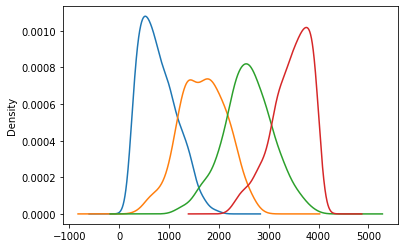

In [12]:
##distribución de las variables
df.groupby(['price_range'])['ram'].plot(kind="density")


price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: battery_power, dtype: object

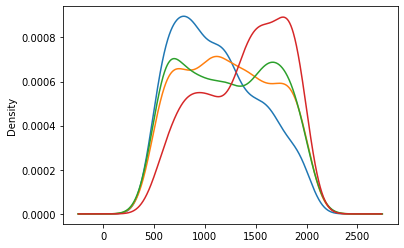

In [13]:
df.groupby(['price_range'])['battery_power'].plot(kind="density")


price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: px_width, dtype: object

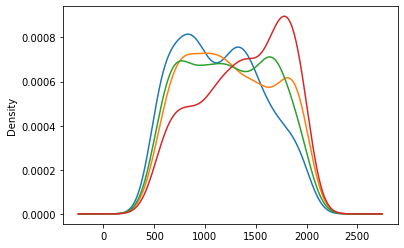

In [14]:
df.groupby(['price_range'])['px_width'].plot(kind="density")


price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: px_height, dtype: object

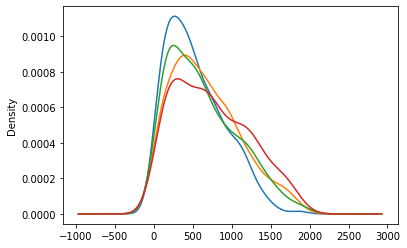

In [15]:
df.groupby(['price_range'])['px_height'].plot(kind="density")

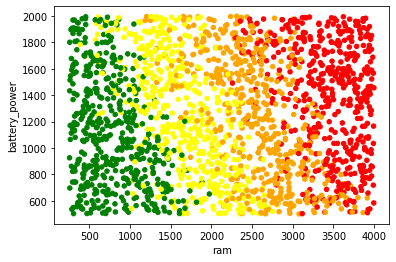

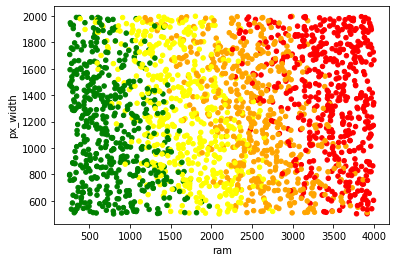

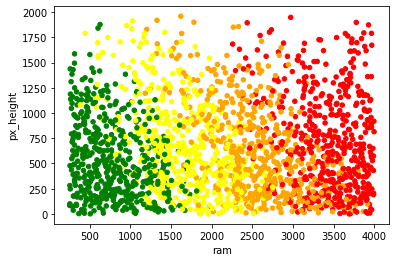

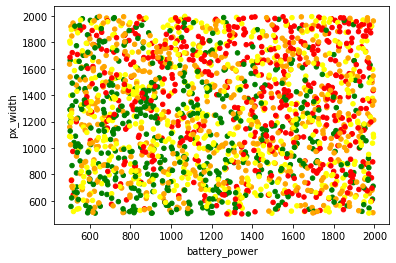

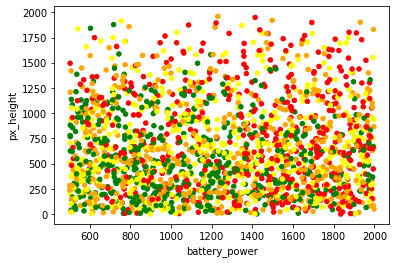

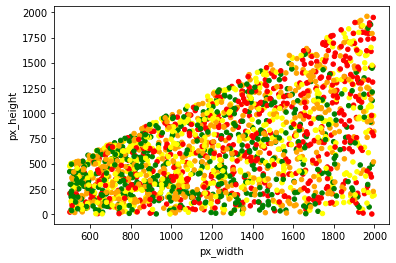

In [16]:
##Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente
##a los puntos que se corresponden con cada una de las 4 categorías a predecir.

dic_colores = {0: 'green', 1: 'yellow', 2: 'orange', 3: 'red'}
colors = df['price_range'].map(dic_colores)

##para el par de variables ram y battery_power   
df.plot.scatter(x= 'ram', y= 'battery_power', c=colors)
##para el par de variables ram y px_width
df.plot.scatter(x= 'ram', y= 'px_width', c=colors)
##para el par de variables ram y px_height
df.plot.scatter(x= 'ram', y= 'px_height', c=colors) 
##para el par de variables battery_power  y px_width
df.plot.scatter(x= 'battery_power', y= 'px_width', c=colors)
##para el par de variables battery_power  y px_height
df.plot.scatter(x= 'battery_power', y= 'px_height', c=colors)
##para el par de variables px_width y px_height
df.plot.scatter(x= 'px_width', y= 'px_height', c=colors)

Las clases se separan para battery_power con ram, px_width con ram y px_height con ram, aunque no se separan por completo, quedan algo entremezcladas. Para el resto de combinaciones las clases quedan completamente mezcladas

Podemos concluir que el precio de los móbiles se puede deducir con gran efectividad basandonos en la ram, si usasemos otros parametros en vez de este, se volvería un problema más complicado con resultados más inexactos.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Las variables de este conjunto de datos son numéricas pero de una escala muy diferente por lo que para usar 
determinadas técnicas (como las basadas en distancia, como el k-NN, y en regresión de variables, como las redes neuronales) suele ser conveniente escalar los datos.

In [17]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler


# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()


df_escalado = df.copy()

##df datos
df_escalado[['battery_power_e','blue_e','clock_speed_e','dual_sim_e','fc_e','four_g_e','int_memory_e','m_dep_e','mobile_wt_e','n_cores_e','pc_e','px_height_e','px_width_e','ram_e','sc_h_e','sc_w_e','talk_time_e','three_g_e','touch_screen_e','wifi_e']] = scaler.fit_transform(df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]) # Lo almacenamos en el dataset original

##en df_Escalado guardamos los datos originales y los escalados
##y en df_e solo los escalados 


df_e = df_escalado.loc[:,['battery_power_e','blue_e','clock_speed_e','dual_sim_e','fc_e','four_g_e','int_memory_e','m_dep_e','mobile_wt_e','n_cores_e','pc_e','px_height_e','px_width_e','ram_e','sc_h_e','sc_w_e','talk_time_e','three_g_e','touch_screen_e','wifi_e']].copy()
df_e_target = df.loc[:,['price_range']].copy()

##df_e contiene las variables de datos escalados
df_e

df_e_target ##contiene el target 







,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

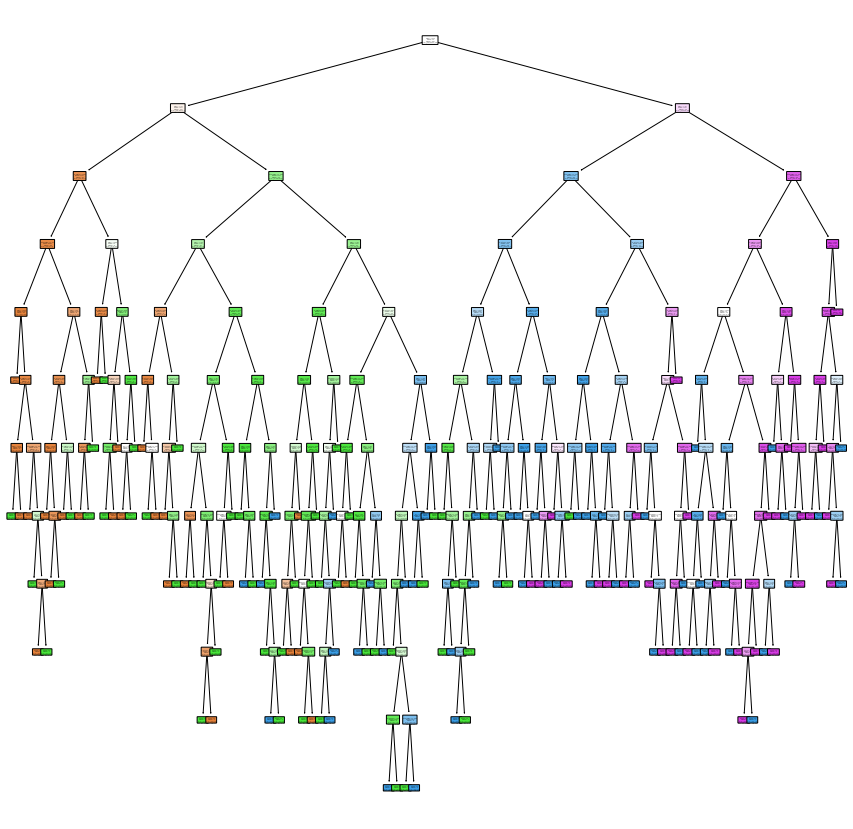

In [20]:
##primero pintamos el árbol con valor min_samples_split = 2, a continuación probaremos con diferentes valores.
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=2, random_state=333)
clf.fit(df_e.to_numpy(), df_e_target['price_range'].to_numpy())
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

##lista de valores de price_range
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names = df_e.columns.values.tolist(), class_names = target_names, rounded=True)
plt.show()

In [21]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintos valores para min_samples_split 
min_samples = range(2,10)
for x in min_samples: 
  ##creamos arbol con el valor x para el parametro min_samples_Split
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=x, random_state=333)
    ##fit del arbol a nuestros datos
    clf.fit(df_e.to_numpy(), df_e_target['price_range'].to_numpy())
    ##cross validation en 10 partes
    scores = cross_validate(clf, df_e.to_numpy(), df_e_target.to_numpy(), scoring='accuracy', cv=10, return_train_score=True)
    
    ##guardamos datos de accuracy de cada arbol en un array
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy
test_accuracy

[0.8525,
 0.8554999999999999,
 0.8539999999999999,
 0.853,
 0.858,
 0.8584999999999999,
 0.8585,
 0.8535]

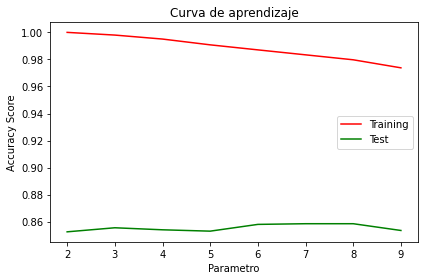

In [22]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(min_samples, train_accuracy, color="r",  label="Training")
plt.plot(min_samples, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   


Analizando la curva de aprendizaje, vemos que hay perdida de entrenamiento, por lo que el clasificador se nos queda corto (underfitted). 

Muestra dos líneas casi planas que indican que el clasificador no pudo aprender del conjunto de datos de entrenamiento.

A medida que el valor del parametro se hace mayor, el valor de training y test disminuyen. 

El valor del parámetro que consideramos más adecuado es min_samples_split = 3, ya que es un máximo local de test y a mayor valor training baja. 



## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

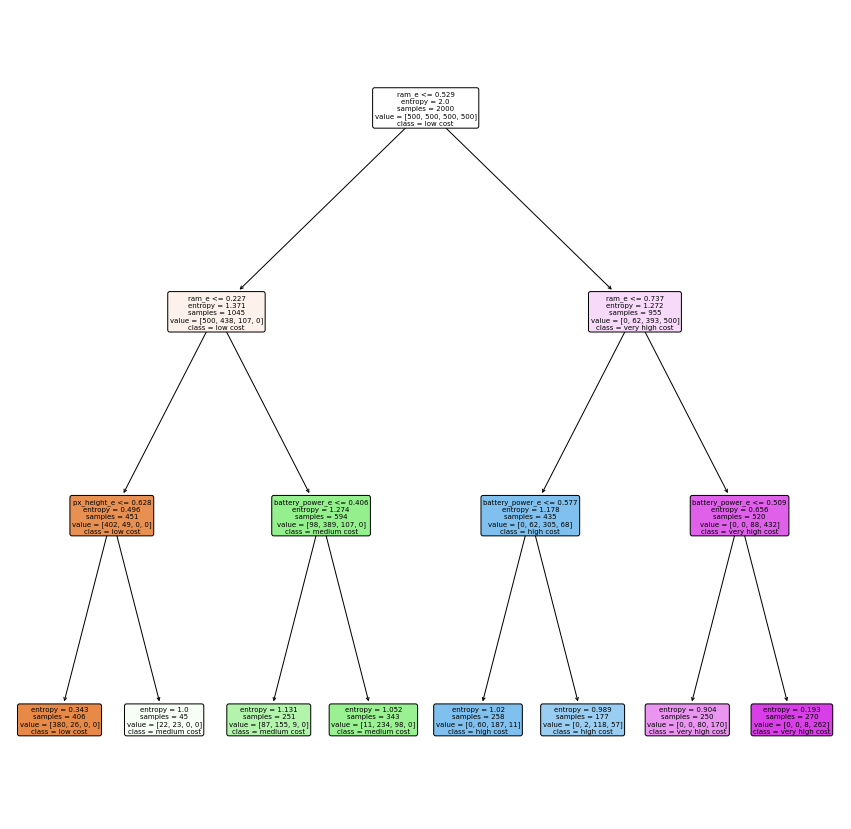

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

##pintamos el árbol con valor min_samples_split = 3
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3, min_samples_split=3, random_state=333)
clf.fit(df_e.to_numpy(), df_e_target['price_range'].to_numpy())

##esto lo usaremos más tarde 
predictions = cross_val_predict(clf, df_e.to_numpy(), df_e_target['price_range'].to_numpy(), cv=10)

##lista de valores de price_range
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names = df_e.columns.values.tolist(), class_names = target_names, rounded=True)
plt.show()

Feature: 0, Score: 0.10160
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01600
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.88240
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


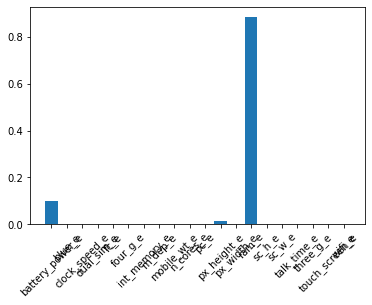

In [25]:
from matplotlib import pyplot as plt

importance = clf.feature_importances_
# summarize feature importance



for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feature_names = df_e.columns.values.tolist()
plt.bar([x for x in range(len(importance))], importance, tick_label = feature_names)
plt.xticks(rotation = 45) 
plt.show()



Las variables más importantes en orden descendente son ram, battery_power y px_weight. El resto de variables no se han usado. 

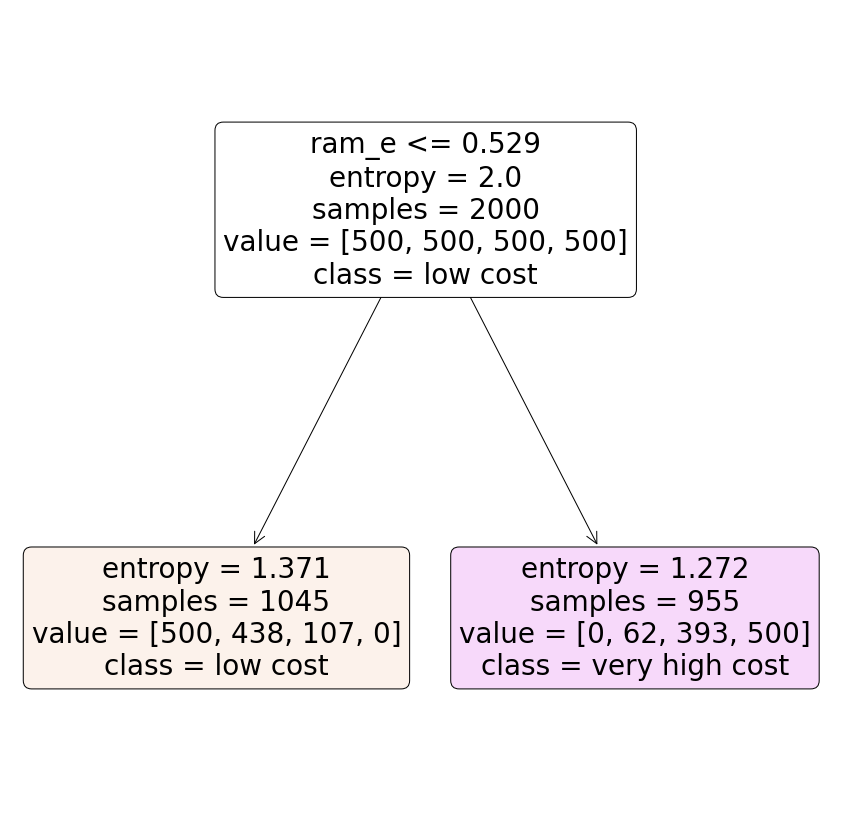

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [26]:
##para responder a la pregunta '¿Cuál sería la tasa de aciertos (accuracy) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?'
##pintamos el árbol con valor min_samples_split = 3 y max_depth = 2 
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 1, min_samples_split=3, random_state=333)
clf.fit(df_e.to_numpy(), df_e_target['price_range'].to_numpy())
scores = cross_validate(clf, df_e.to_numpy(), df_e_target.to_numpy(), scoring='accuracy', cv=10, return_train_score=True)
# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = scores['train_score']
test_accuracy = scores['test_score']

##lista de valores de price_range
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names = df_e.columns.values.tolist(), class_names = target_names, rounded=True)
plt.show()

print(train_accuracy, test_accuracy)



La tasa de aciertos haciendo solo una pregunta es del 50%. El árbol no separa las clases del todo, podemos ver que están casi separadas pero se entremezclan ligeramente con las clases vecinas. En el árbol parcial podemos observar que la variable ram ayuda mucho a discriminar las clases y en el árbol completo hemos visto que las clases lejanas (como low cost y very high cost) no se mezclan entre ellas.

In [27]:


# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          # ... and label them with the respective list entries
          xticklabels=classes, yticklabels=classes,
          title=title,
          ylabel='True label',
          xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[395 105   0   0]
 [ 52 386  62   0]
 [  0 112 300  88]
 [  0   0  69 431]]


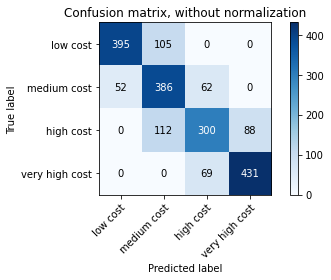

In [28]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
plot_confusion_matrix(df_e_target.to_numpy(), predictions, target_names, normalize=False)

Si observamos la matriz de confusión podemos ver que la clase con más porcentaje de confusión es medium cost (35%), con lo cual el nodo con mayor confusión es el nodo verde, que pertenece a esta clase.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [29]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=3, random_state=333)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, df_e.to_numpy(), df_e_target.to_numpy(), scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8572398678220704
Exhaustividad ponderada media:  0.8554999999999999
F1 ponderado media:  0.8555211439572046


En general, a partir de estas métricas podemos concluir que el clasificador tiene buen funcionamiento, ya que los valores son altos.

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=3, random_state=333)
predictions = cross_val_predict(clf, df_e.to_numpy(), df_e_target.to_numpy(), cv=10)

# Informe por clases
names = ['low cost', 'medium cost', 'high cost', 'very high cost']
cr = classification_report(df_e_target.to_numpy(),predictions, target_names=names)
print(cr)

                precision    recall  f1-score   support

      low cost       0.90      0.90      0.90       500
   medium cost       0.83      0.82      0.82       500
     high cost       0.80      0.81      0.81       500
very high cost       0.88      0.89      0.89       500

      accuracy                           0.86      2000
     macro avg       0.86      0.86      0.86      2000
  weighted avg       0.86      0.86      0.86      2000



Según el informe detallado, el clasificador funciona mejor para las clases extremas (low cost y very high cost), ya que tienen valores más altos que las clases medias 




Finalmente podemos afirmar que el clasificador es bastante fiable pero podría serlo más, ya que tiene una precisión media del 86% y una exhaustividad media del 86%. Sabiendo sobre que valores se venden los productos (teléfonos móviles) dependiendo de sus especificaciones podría ayudar a la empresa, ajustandolos a esos precios para venderlos más.

Las ventajas de utilizar un clasificador basado en árboles de decisión son la facilidad de entenderlos e interpretarlos, ya que podemos ver el árbol y ver depende de que variable se separan los nodos. También podemos decir que el clasificador basado en árboles de decisión es útil en exploración de datos, podemos identificar la importancia de las variables a partir de otras muchas.

Como desventajas podemos comentar la inestabilidad que tiene, un pequeño cambio en los datos puede modificar ampliamente toda la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece. También podemos comentar como desventaja el sobreajuste que puede ocurrir cuando la predicción sigue los datos excesivamente. 

## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.


Partimos de que tenemos las variables más relevantes en un datafrane escalado df_e y df_e_target con la variable target. 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

##tenemos que considerar que valor de k (número de vecinos) es el más adecuado
##usando validación cruzada.

##guardamos los valores de medias y desviaciones tipicas de acuraci para diferentes valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,1001)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, df_e.to_numpy(), df_e_target.to_numpy().ravel(), scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[0.378,
 0.378,
 0.3845,
 0.392,
 0.40800000000000003,
 0.41200000000000003,
 0.41500000000000004,
 0.40800000000000003,
 0.4175,
 0.418,
 0.43649999999999994,
 0.44350000000000006,
 0.44800000000000006,
 0.45599999999999996,
 0.465,
 0.4645,
 0.46699999999999997,
 0.4665,
 0.457,
 0.4665,
 0.479,
 0.4840000000000001,
 0.4925,
 0.4955,
 0.49750000000000005,
 0.49450000000000005,
 0.497,
 0.506,
 0.5040000000000001,
 0.5119999999999999,
 0.5165,
 0.5155000000000001,
 0.5155,
 0.5095000000000001,
 0.5109999999999999,
 0.5120000000000001,
 0.512,
 0.5149999999999999,
 0.52,
 0.5275,
 0.531,
 0.5365,
 0.534,
 0.536,
 0.5345000000000001,
 0.5365,
 0.539,
 0.5425000000000001,
 0.5450000000000002,
 0.5405,
 0.546,
 0.546,
 0.5459999999999999,
 0.5505,
 0.5515000000000001,
 0.5490000000000002,
 0.5429999999999999,
 0.5405,
 0.5399999999999999,
 0.5415,
 0.5495,
 0.5485,
 0.5445,
 0.549,
 0.5519999999999999,
 0.548,
 0.5489999999999999,
 0.5435000000000001,
 0.5425,
 0.5410000000000001,
 0.545,

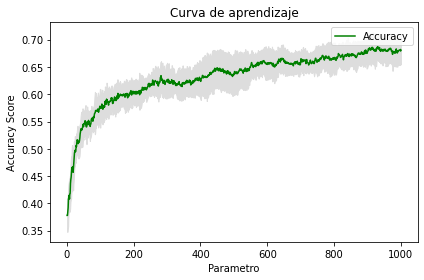

In [32]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Vemos que el valor de accuracy es muy bajo para valores pequeños de k (nº de vecinos). Según el diagrama superior, la función es totalmente logaritmica. Vamos a usar el mejor valor que hemos sacado k = 1000. 

In [33]:
##sacamos las metricas exactas para el valor de k que hemos elegido

# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = KNeighborsClassifier(1000, weights='distance')

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, df_e.to_numpy(), df_e_target.to_numpy().ravel(), scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.6877254016494775
Exhaustividad ponderada media:  0.6799999999999999
F1 ponderado media:  0.6778634519090916


In [34]:
##calculamos la precision exhausividad y medida F1 de cada una de las clases
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = KNeighborsClassifier(1000, weights='distance')
predictions = cross_val_predict(clf, df_e.to_numpy(), df_e_target.to_numpy().ravel(), cv=10)
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
# Informe por clases
cr = classification_report( df_e_target.to_numpy().ravel(), predictions, target_names=target_names)
print(cr)

                precision    recall  f1-score   support

      low cost       0.79      0.86      0.82       500
   medium cost       0.62      0.49      0.55       500
     high cost       0.54      0.65      0.59       500
very high cost       0.80      0.72      0.76       500

      accuracy                           0.68      2000
     macro avg       0.69      0.68      0.68      2000
  weighted avg       0.69      0.68      0.68      2000



Vemos que para un número muy grande de k no nos da valores buenos, la precision es del 69% y el accuracy de 68%. Afirmamos que  utilizar un clasificador basado en árboles de decisión es una opción mejor para este problema. 

Es mejor utilizar un clasificador basado en árboles de decisión porque es más rápido, ya que utiliza interacción automática de características. Para utilizar el K-NN y que sea óptimo el tamaño de los datos debe ser pequeño.
